In [1]:
import pickle
from functools import partial

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def subsample_to_length(arr, target_size, axis=-2):
    "Regularly subsamples array to target length in axis."
    current_size = arr.shape[axis]
    stride_length = int(current_size / target_size)

    arr = jax.lax.slice_in_dim(arr, start_index=0, limit_index=stride_length * target_size, stride=1, axis=axis)
    arr = jax.lax.slice_in_dim(arr, start_index=0, limit_index=-1, stride=stride_length, axis=axis)

    assert arr.shape[axis] == target_size

    return arr


def load_data(filename: str) -> dict:
    if filename.endswith(".pickle"):
        key, _, _ = filename.rpartition(".")
        with open(filename, "rb") as f:
            data = pickle.load(f)

    return data

## Course 2023: synthetic datasets from Example 1

In [ ]:
course_data_path = "/cephfs_projects/foundation_models/data/SDE_synthetic_test_sets"


def plot_course_synthetic_dataset(course_data_path, equation_name):
    obs_times = load_data(course_data_path + "/" + equation_name + "_grid.pickle")
    clean_obs_values = load_data(course_data_path + "/" + equation_name + "_values.pickle")
    noisy_obs_values = load_data(course_data_path + "/" + equation_name + "_gaussian_noise_values.pickle")

    print("Original shapes: obs_times ", obs_times.shape, " obs_values ", clean_obs_values.shape)

    target_length = 128
    obs_times, clean_obs_values, noisy_obs_values = tuple(
        map(partial(subsample_to_length, target_size=target_length), (obs_times, clean_obs_values, noisy_obs_values))
    )

    print("Shapes after regular subsampling : obs_times ", obs_times.shape, " obs_values ", clean_obs_values.shape)

    if clean_obs_values.shape[-1] == 2:
        fig = plt.Figure()
        ax = fig.add_axes(111)

        for i in range(noisy_obs_values.shape[0]):
            ax.plot(
                noisy_obs_values[i, :, 0],
                noisy_obs_values[i, :, 1],
                label="Noisy Observations" if i == 0 else None,
                color="black",
                linewidth=0.5,
            )
            ax.plot(
                clean_obs_values[i, :, 0],
                clean_obs_values[i, :, 1],
                label="Clean Observations" if i == 0 else None,
                color="blue",
                linewidth=0.5,
            )

    elif clean_obs_values.shape[-1] == 3:
        fig = plt.Figure()
        ax = fig.add_axes(111, projection="3d")

        for i in range(noisy_obs_values.shape[0]):
            ax.plot(
                noisy_obs_values[i, :, 0],
                noisy_obs_values[i, :, 1],
                noisy_obs_values[i, :, 2],
                label="Noisy Observations" if i == 0 else None,
                color="black",
                linewidth=0.5,
            )
            ax.plot(
                clean_obs_values[i, :, 0],
                clean_obs_values[i, :, 1],
                clean_obs_values[i, :, 3],
                label="Clean Observations" if i == 0 else None,
                color="blue",
                linewidth=0.5,
            )

    fig.legend()
    return fig

In [ ]:
equation_name = "damped_linear_oscillator"
fig = plot_course_synthetic_dataset(course_data_path, equation_name)
fig

In [ ]:
equation_name = "damped_cubic_oscillator"
fig = plot_course_synthetic_dataset(course_data_path, equation_name)
fig

In [ ]:
equation_name = "duffing_oscillator"
fig = plot_course_synthetic_dataset(course_data_path, equation_name)
fig

In [ ]:
equation_name = "selkov_glycolysis"
fig = plot_course_synthetic_dataset(course_data_path, equation_name)
fig

In [ ]:
equation_name = "hopf_bifurcation"
fig = plot_course_synthetic_dataset(course_data_path, equation_name)
fig

In [ ]:
equation_name = "lorentz_63"
fig = plot_course_synthetic_dataset(course_data_path, equation_name)
fig

## Batz 2018 - Double-well diffusion model with state-dependent diffusion (eq. 29 in Batz 2018)

In [ ]:
batz_data_dir = "/cephfs_projects/foundation_models/data/SDE_synthetic_test_sets/"
obs_times_file = "double_well_grid.pickle"
obs_values_file = "double_well_values.pickle"

obs_times = load_data(batz_data_dir + "/" + obs_times_file)
obs_values = load_data(batz_data_dir + "/" + obs_values_file)

print("Observation times shape: ", obs_times.shape)
print("Observation values shape: ", obs_values.shape)

In [ ]:
chunk_length = 128

chunk_count = int(obs_times.shape[1] / chunk_length)
print(f"Chunked into chunks of length {chunk_length}, a single long trajectory yields {chunk_count} trajectories.")

In [ ]:
# plot one complete trajectory
plt.plot(obs_times[0].squeeze(), obs_values[0].squeeze(), linewidth=0.5, color="black")

In [ ]:
# plot multiple trajectories
trajectory_count = 3
for traj in range(trajectory_count):
    plt.plot(obs_times[traj].squeeze(), obs_values[traj].squeeze(), linewidth=0.5)

In [ ]:
# plot length 128 chunks
trajectory_num = 0
chunk_count = 5
chunk_length = 128

for chunk in range(chunk_count):
    plt.plot(
        obs_times[trajectory_num, chunk * chunk_length : (chunk + 1) * chunk_length],
        obs_values[trajectory_num, chunk * chunk_length : (chunk + 1) * chunk_length],
    )

In [ ]:
# plot length 128 chunks all starting at 0
trajectory_num = 0
chunk_count = 10
chunk_length = 128

for chunk in range(chunk_count):
    plt.plot(obs_times[trajectory_num, 0:chunk_length], obs_values[trajectory_num, chunk * chunk_length : (chunk + 1) * chunk_length])

## Wang 2022 - synthetic two-dimensional SDE (Example 5, Supplementary material S3.5)

In [3]:
wang_data_dir = "/cephfs_projects/foundation_models/data/SDE_synthetic_test_sets/"
obs_times_file = "double_well2_grid.pickle"
obs_values_file = "double_well2_values.pickle"

obs_times = load_data(batz_data_dir + "/" + obs_times_file)
obs_values = load_data(batz_data_dir + "/" + obs_values_file)

print("Observation times shape: ", obs_times.shape)
print("Observation values shape: ", obs_values.shape)

NameError: name 'batz_data_dir' is not defined

In [ ]:
obs_times = obs_times.squeeze()
obs_values = obs_values.squeeze()

In [ ]:
chunk_length = 128

chunk_count = int(obs_times.shape[0] / chunk_length)
print(f"Chunked into chunks of length {chunk_length} it yields {chunk_count} trajectories.")

In [ ]:
# plot one complete trajectory for each dimension separately
plt.plot(obs_times, obs_values, linewidth=0.5, color="black")

## Beijing Air Quality Data

In [4]:
# air_quality_dir = "/cephfs_projects/foundation_models/data/SDE_beijing_air_quality"
air_quality_dir = "/Users/patrickseifner/repos/FIM/data/raw/SDE_beijing_air_quality"
files = {
    "Aotizhongxin": "PRSA_Data_Aotizhongxin_20130301-20170228.pickle",
    "Changping": "PRSA_Data_Changping_20130301-20170228.pickle",
    "Dingling": "PRSA_Data_Dingling_20130301-20170228.pickle",
    "Dongsi": "PRSA_Data_Dongsi_20130301-20170228.pickle",
    "Guanyuan": "PRSA_Data_Guanyuan_20130301-20170228.pickle",
    "Gucheng": "PRSA_Data_Gucheng_20130301-20170228.pickle",
    "Huairou": "PRSA_Data_Huairou_20130301-20170228.pickle",
    "Nongzhanguan": "PRSA_Data_Nongzhanguan_20130301-20170228.pickle",
    "Shunyi": "PRSA_Data_Shunyi_20130301-20170228.pickle",
    "Tiantan": "PRSA_Data_Tiantan_20130301-20170228.pickle",
    "Wanliu": "PRSA_Data_Wanliu_20130301-20170228.pickle",
    "Wanshouxigong": "PRSA_Data_Wanshouxigong_20130301-20170228.pickle",
}

datasets = {key: load_data(air_quality_dir + "/" + value) for key, value in files.items()}

print("Observations per file: ")
for key, value in datasets.items():
    print(key, value.shape)

Observations per file: 
Aotizhongxin (35064, 6)
Changping (35064, 6)
Dingling (35064, 6)
Dongsi (35064, 6)
Guanyuan (35064, 6)
Gucheng (35064, 6)
Huairou (35064, 6)
Nongzhanguan (35064, 6)
Shunyi (35064, 6)
Tiantan (35064, 6)
Wanliu (35064, 6)
Wanshouxigong (35064, 6)


In [5]:
chunk_length = 128

chunk_count = int(datasets["Wanshouxigong"].shape[0] / chunk_length)
print(f"Chunked into chunks of length {chunk_length}, a single dimension of each trajectory yields {chunk_count} trajectories.")

Chunked into chunks of length 128, a single dimension of each trajectory yields 273 trajectories.


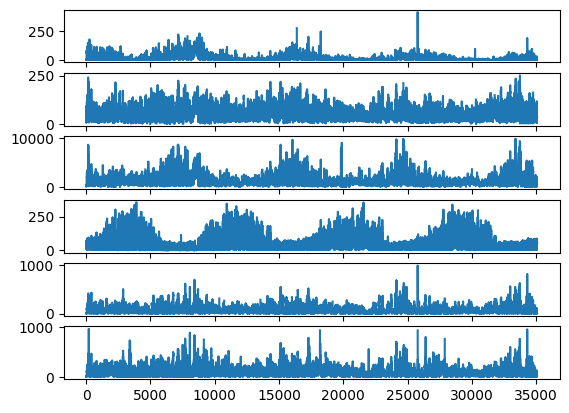

In [6]:
# Plot all dimensions of one key
key = "Wanshouxigong"

fig, axs = plt.subplots(6, 1)

for dim in range(6):
    axs[dim].plot(datasets[key][:, dim])

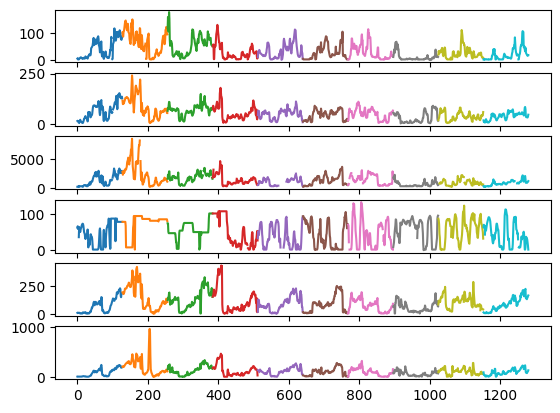

In [7]:
# Plot all dimensions of one key in smaller chunks
chunk_count = 10
chunk_length = 128

fig, axs = plt.subplots(6, 1)

dummy_times = np.arange(datasets[key].shape[0])
for dim in range(6):
    for chunk in range(chunk_count):
        axs[dim].plot(
            dummy_times[chunk * chunk_length : (chunk + 1) * chunk_length],
            datasets[key][chunk * chunk_length : (chunk + 1) * chunk_length :, dim],
        )

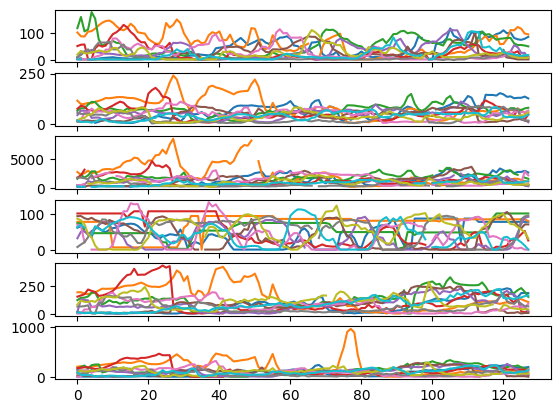

In [8]:
# Plot all dimensions of one key in smaller chunks, starting at same times
chunk_count = 10
chunk_length = 128

fig, axs = plt.subplots(6, 1)

for dim in range(6):
    for chunk in range(chunk_count):
        axs[dim].plot(datasets[key][chunk * chunk_length : (chunk + 1) * chunk_length :, dim])

## Wang 2022 - Real world datasets
### Stocks

In [9]:
# files_dir = "/cephfs_projects/foundation_models/data/SDE_data_driven_BISDE_datasets/stonks"
files_dir = "/Users/patrickseifner/repos/FIM/data/raw/SDE_data_driven_BISDE_datasets/stonks"
files = {"facebook": "fb_stock_price.pickle", "tesla": "tsla_stock_price.pickle"}

datasets = {key: load_data(files_dir + "/" + value) for key, value in files.items()}

print("Observations per file: ")
for key, value in datasets.items():
    print(key, value.shape)

Observations per file: 
facebook (24960,)
tesla (24960,)


In [10]:
chunk_length = 128

chunk_count = int(datasets["tesla"].shape[0] / chunk_length)
print(f"Chunked into chunks of length {chunk_length}, each trajectory yields {chunk_count} trajectories.")

Chunked into chunks of length 128, each trajectory yields 195 trajectories.


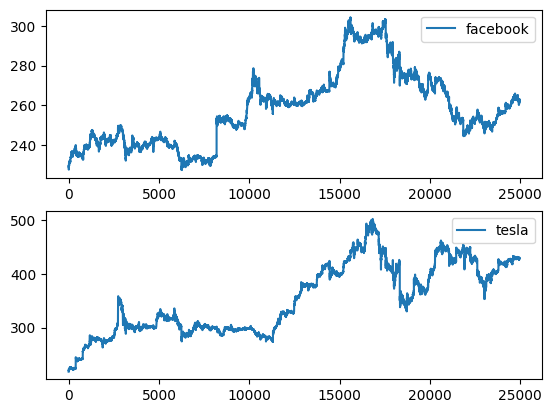

In [11]:
# Plot complete trajectory for both stocks
fig, axs = plt.subplots(2, 1)

for num, (name, stock) in enumerate(datasets.items()):
    axs[num].plot(stock, label=name)
    axs[num].legend()

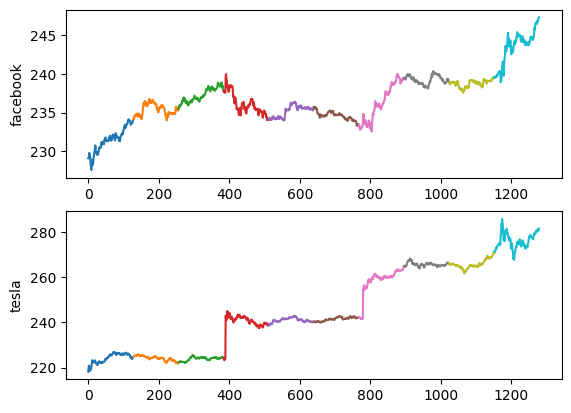

In [12]:
# Plot chunks per stock
chunk_count = 10
chunk_length = 128

dummy_times = np.arange(datasets[key].shape[0])

fig, axs = plt.subplots(2, 1)
for chunk in range(chunk_count):
    for num, (name, stock) in enumerate(datasets.items()):
        axs[num].plot(
            dummy_times[chunk * chunk_length : (chunk + 1) * chunk_length], stock[chunk * chunk_length : (chunk + 1) * chunk_length]
        )
        axs[num].set_ylabel(name)

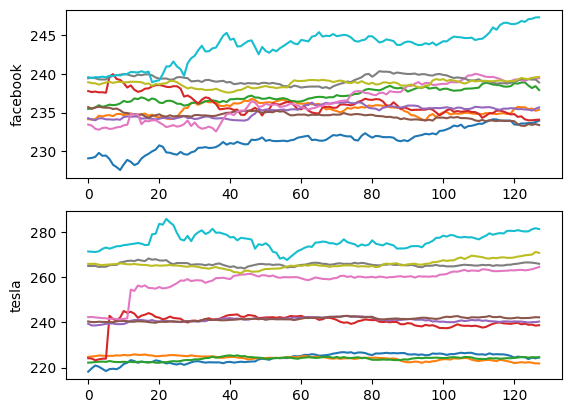

In [13]:
# Plot chunks per stock starting at 0
chunk_count = 10
chunk_length = 128

fig, axs = plt.subplots(2, 1)
for chunk in range(chunk_count):
    for num, (name, stock) in enumerate(datasets.items()):
        axs[num].plot(stock[chunk * chunk_length : (chunk + 1) * chunk_length])
        axs[num].set_ylabel(name)

## Wind

In [14]:
# files_dir = "/cephfs_projects/foundation_models/data/SDE_data_driven_BISDE_datasets/wind"
files_dir = "/Users/patrickseifner/repos/FIM/data/raw/SDE_data_driven_BISDE_datasets/wind"
files = {"fluctuations": "wind_speed_fluctuations.pickle", "speed": "wind_speeds.pickle"}

datasets = {key: load_data(files_dir + "/" + value) for key, value in files.items()}

print("Observations per file: ")
for key, value in datasets.items():
    print(key, value.shape)

Observations per file: 
fluctuations (26207,)
speed (26208,)


In [15]:
chunk_length = 128

chunk_count = int(datasets["speed"].shape[0] / chunk_length)
print(f"Chunked into chunks of length {chunk_length}, each trajectory yields {chunk_count} trajectories.")

Chunked into chunks of length 128, each trajectory yields 204 trajectories.


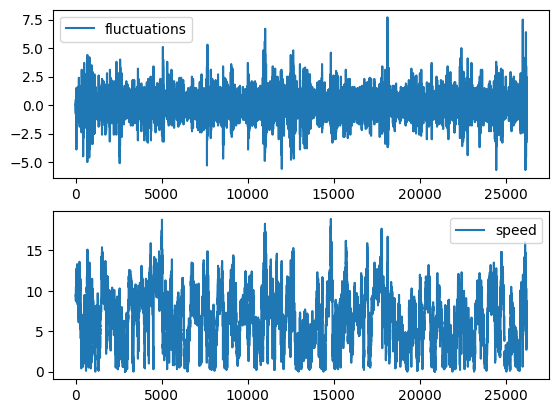

In [16]:
# Plot complete trajectory for both
fig, axs = plt.subplots(2, 1)

for num, (name, stock) in enumerate(datasets.items()):
    axs[num].plot(stock, label=name)
    axs[num].legend()

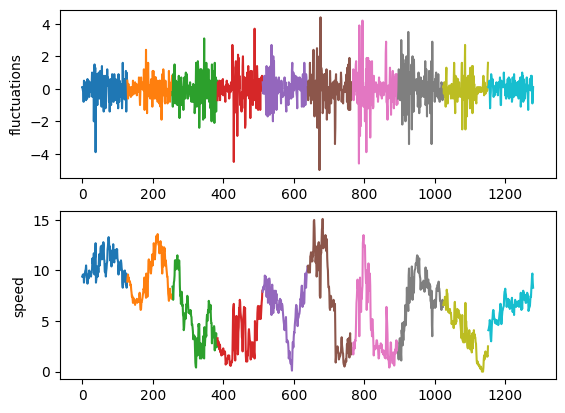

In [17]:
# Plot chunks
chunk_count = 10
chunk_length = 128

dummy_times = np.arange(datasets[key].shape[0])

fig, axs = plt.subplots(2, 1)
for chunk in range(chunk_count):
    for num, (name, stock) in enumerate(datasets.items()):
        axs[num].plot(
            dummy_times[chunk * chunk_length : (chunk + 1) * chunk_length], stock[chunk * chunk_length : (chunk + 1) * chunk_length]
        )
        axs[num].set_ylabel(name)

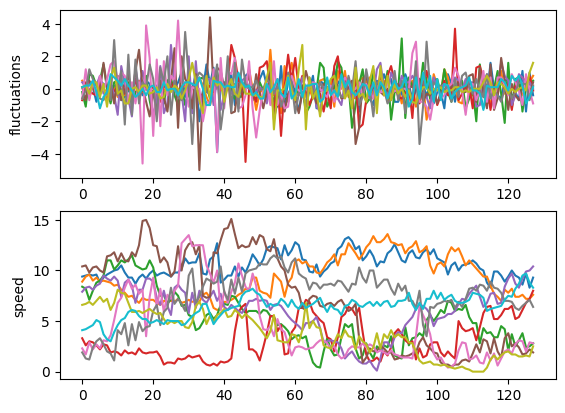

In [18]:
# Plot chunks starting at 0
chunk_count = 10
chunk_length = 128

fig, axs = plt.subplots(2, 1)
for chunk in range(chunk_count):
    for num, (name, stock) in enumerate(datasets.items()):
        axs[num].plot(stock[chunk * chunk_length : (chunk + 1) * chunk_length])
        axs[num].set_ylabel(name)

## Oil

In [19]:
# files_dir = "/cephfs_projects/foundation_models/data/SDE_data_driven_BISDE_datasets/oil"
files_dir = "/Users/patrickseifner/repos/FIM/data/raw/SDE_data_driven_BISDE_datasets/oil"
files = {"fluctuations": "oil_price_fluctuations.pickle", "price": "oil_prices.pickle"}

datasets = {key: load_data(files_dir + "/" + value) for key, value in files.items()}

print("Observations per file: ")
for key, value in datasets.items():
    print(key, value.shape)

Observations per file: 
fluctuations (7921,)
price (7922,)


In [20]:
chunk_length = 128

chunk_count = int(datasets["price"].shape[0] / chunk_length)
print(f"Chunked into chunks of length {chunk_length}, each trajectory yields {chunk_count} trajectories.")

Chunked into chunks of length 128, each trajectory yields 61 trajectories.


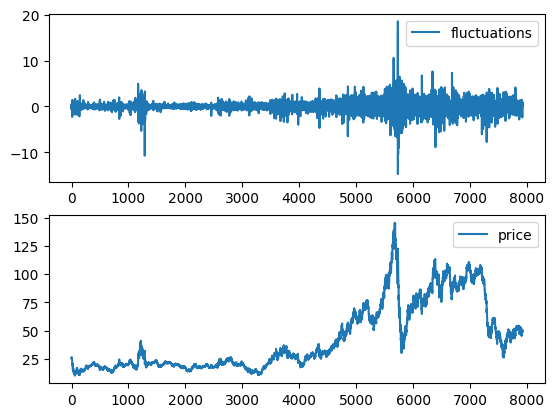

In [21]:
# Plot complete trajectory for both
fig, axs = plt.subplots(2, 1)

for num, (name, stock) in enumerate(datasets.items()):
    axs[num].plot(stock, label=name)
    axs[num].legend()

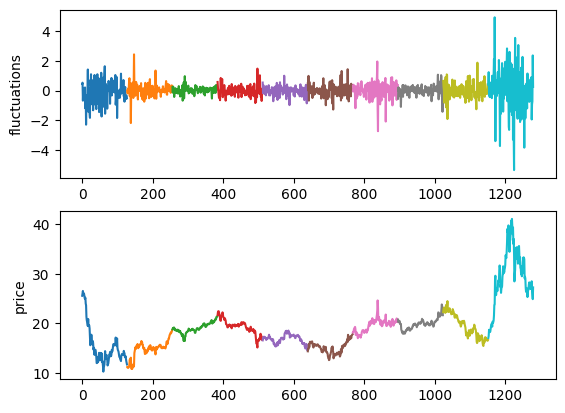

In [22]:
# Plot chunks
chunk_count = 10
chunk_length = 128

dummy_times = np.arange(datasets[key].shape[0])

fig, axs = plt.subplots(2, 1)
for chunk in range(chunk_count):
    for num, (name, stock) in enumerate(datasets.items()):
        axs[num].plot(
            dummy_times[chunk * chunk_length : (chunk + 1) * chunk_length], stock[chunk * chunk_length : (chunk + 1) * chunk_length]
        )
        axs[num].set_ylabel(name)

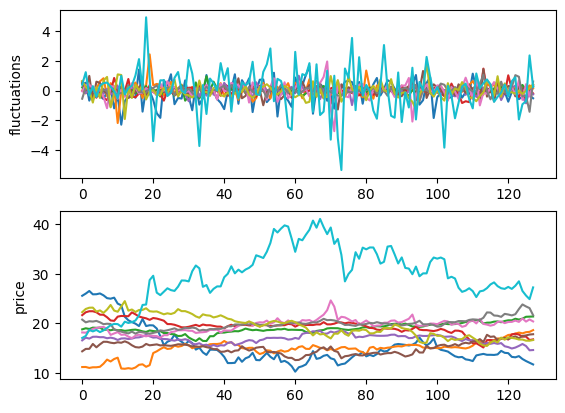

In [23]:
# Plot chunks starting at 0
chunk_count = 10
chunk_length = 128

fig, axs = plt.subplots(2, 1)
for chunk in range(chunk_count):
    for num, (name, stock) in enumerate(datasets.items()):
        axs[num].plot(stock[chunk * chunk_length : (chunk + 1) * chunk_length])
        axs[num].set_ylabel(name)